# Estudo dos Dados


### Importar Bibliotecas para Análise dos Dados


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importar dataset

In [137]:
##from google.colab import files
##file1 = files.upload()
##file2 = files.upload()

### Trabalhar com dataset

In [138]:
df_train = pd.read_csv('training.csv',';')
df_test = pd.read_csv('test.csv',sep=';')

In [139]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [140]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1    workclass              32561 non-null  object
 2    fnlwgt                 32561 non-null  int64 
 3    education              32561 non-null  object
 4    education-num          32561 non-null  int64 
 5    marital-status         32561 non-null  object
 6    occupation             32561 non-null  object
 7    relationship           32561 non-null  object
 8    race                   32561 non-null  object
 9    sex                    32561 non-null  object
 10   capital-gain           32561 non-null  int64 
 11   capital-loss           32561 non-null  int64 
 12   hours-per-week         32561 non-null  int64 
 13   native-country         32561 non-null  object
 14   salary-classification  32561 non-null  object
dtypes:

In [141]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [142]:
df_train.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary-classification'],
      dtype='object')

### Observação problema com Space
Foi observado que os nomes das features estavam com espaçamento, bem como o valor que foi posto para os missing values não está **'?'** mas sim **' ?'**. 

In [143]:
df_train.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','target']
df_test.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','target']

In [144]:
df_train.describe(include=[object])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,target
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [145]:
def deleteSpace(df):
    lista = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','target']
    for i in lista:
        df[i] = df[i].str.strip()
        
deleteSpace(df_train)
deleteSpace(df_test)

### Tratar missing values

In [146]:
df_train.isin(['?']).sum(axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
target               0
dtype: int64

In [147]:
df_test.isin(['?']).sum(axis=0)

age                 0
workclass         963
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
target              0
dtype: int64

#### Decisão dos Missing Values
Depois de observar os missing values presentes tanto no dataset de treino como o de teste, chegou-se a conclusão que a melhor decissão é deletar os registos os quais contenham missing values. Pois o país de origem, classe de trabalho e ocupação não temos como substituir. 

In [148]:
def deleteMissingValues(df):
    df['occupation'] = df['occupation'].replace('?',np.nan)
    df['workclass'] = df['workclass'].replace('?',np.nan)
    df['native_country'] = df['native_country'].replace('?',np.nan)
    df.dropna(how ='any',inplace = True)

In [149]:
deleteMissingValues(df_train)
deleteMissingValues(df_test)


In [150]:
df_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

## Analisando os Dados

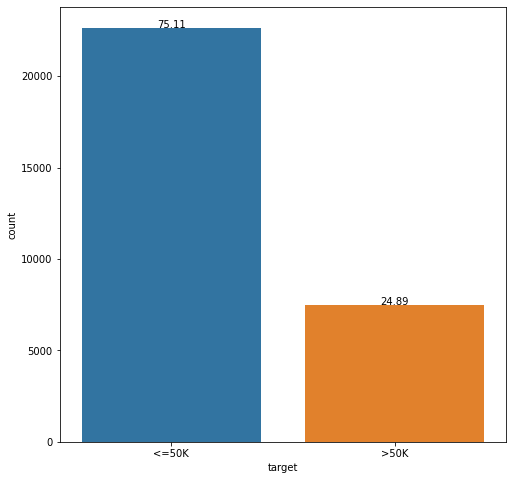

In [151]:
plt.figure(figsize=(8,8))
total = float(len(df_train) )

ax = sns.countplot(x="target", data=df_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

## Observação

Claramente o dataset está desbalanceado pois temos mais resultados coletados de <=50k /y com ~75% em relação ao >50k/y com ~25%

No treinamento dos modelos teremos que levar esse desbalanceamento em conta.

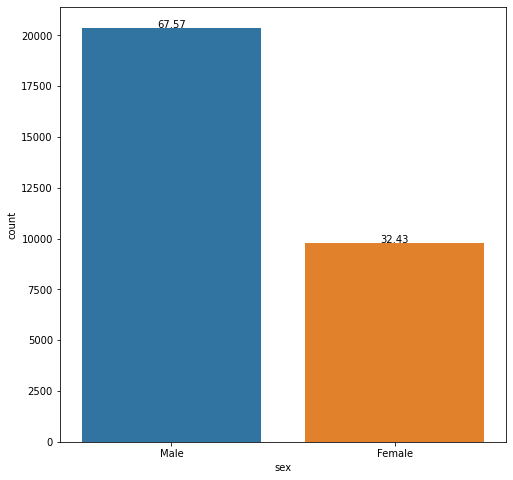

In [152]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="sex", data=df_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

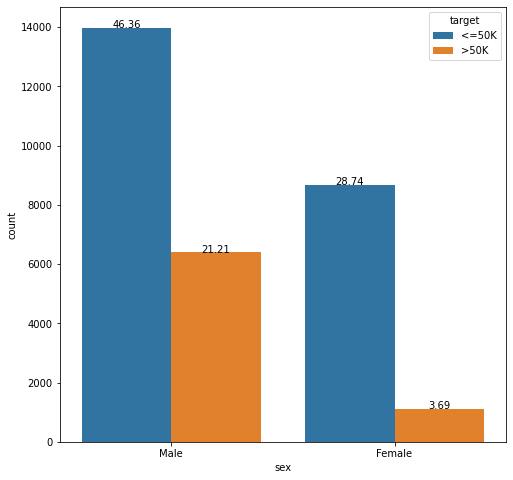

In [153]:
plt.figure(figsize=(8,8))
ax = sns.countplot(x="sex", hue="target", data=df_train)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

<AxesSubplot:>

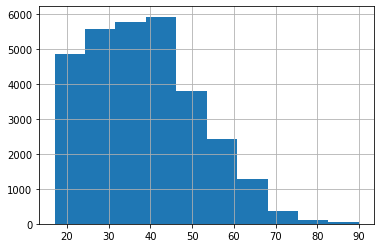

In [154]:
df_train['age'].hist()

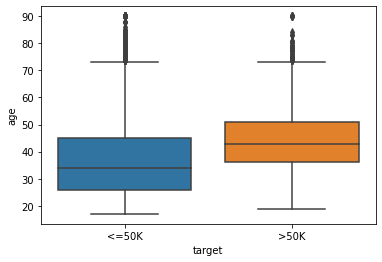

In [155]:
sns.boxplot(x="target", y="age", data=df_train)
plt.show()

In [156]:
df_train[['target', 'age']].groupby(['target'], as_index=False).mean().sort_values(by='age', ascending=False)

,target,age
1,>50K,43.95911
0,<=50K,36.60806


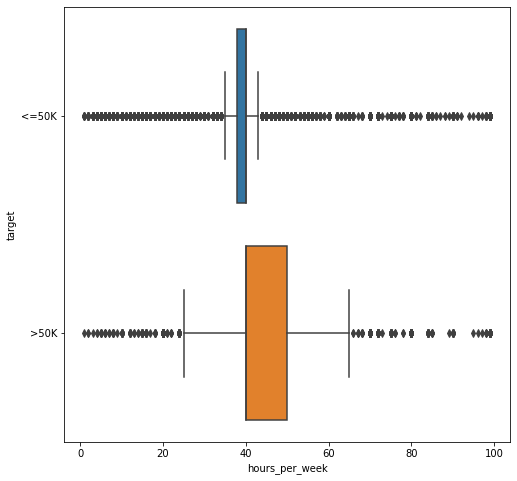

In [157]:
plt.figure(figsize=(8,8))
sns.boxplot(x="hours_per_week", y="target", data=df_train)
plt.show()

In [158]:
df_train[['target', 'hours_per_week']].groupby(['target'], as_index=False).mean().sort_values(by='hours_per_week', ascending=False)

,target,hours_per_week
1,>50K,45.706580
0,<=50K,39.348592


<AxesSubplot:xlabel='count', ylabel='relationship'>

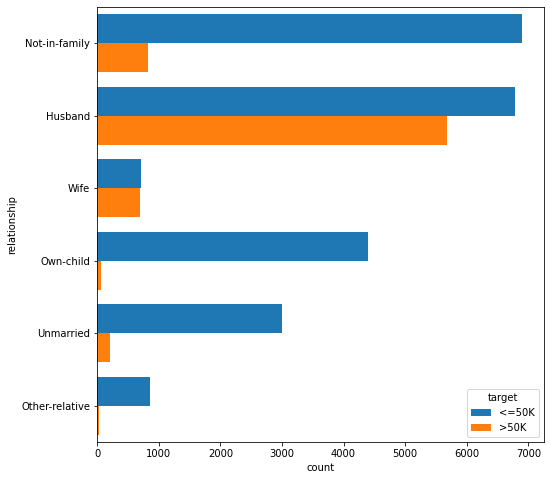

In [159]:
plt.figure(figsize=(8,8))
sns.countplot(y="relationship", hue="target", data=df_train,saturation=1)

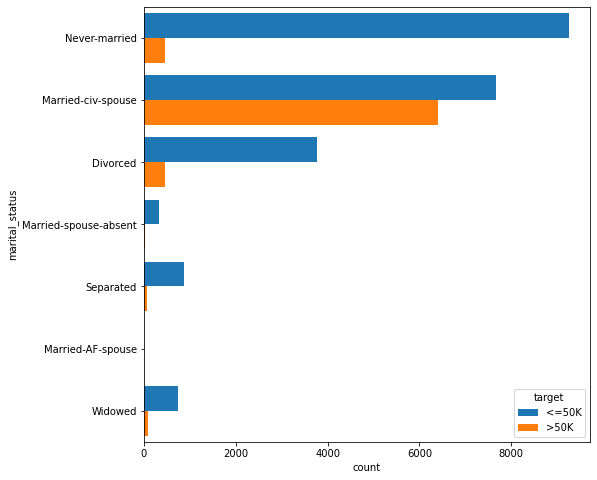

In [160]:
plt.figure(figsize=(8,8))
p=sns.countplot(data=df_train,y="marital_status", hue="target", saturation=1)

##### Nova feature solicitada

In [169]:
def createFeature(df):
    target = df.target
    df = df.drop(columns=['target'])
    df['status'] = df['marital_status'].map({'Married-civ-spouse':'married',
                                                         'Never-married':'single',
                                                         'Divorced':'single',
                                                         'Separated':'single',
                                                         'Widowed':'single',
                                                         'Married-spouse-absent':'married',
                                                         'Married-AF-spouse':'married'})
    df['target'] = target
    return df

In [170]:
df_train = createFeature(df_train)
df_test = createFeature(df_test)

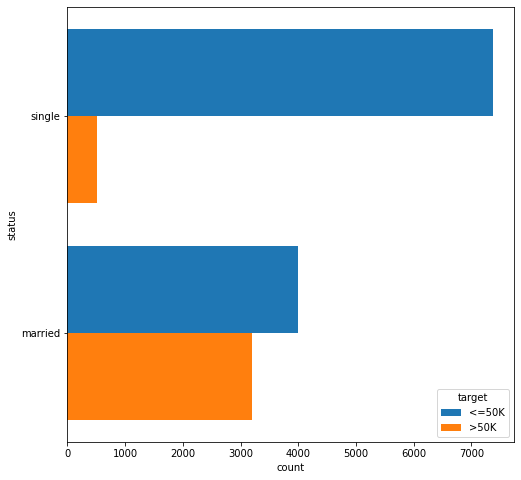

In [165]:
plt.figure(figsize=(8,8))
p=sns.countplot(data=df_train,y="status", hue="target", saturation=1)

In [ ]:
p=sns.countplot(data=df_train,y="workclass", hue="target", saturation=1)

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x="hours_per_week", y="workclass", whis=[0, 100], width=.6, data=df_train)
plt.show()

In [ ]:
sns.boxplot(x="education_num", y="hours_per_week",
            whis=[0, 100], width=.6, data=df_train)
plt.figure(figsize=(8,8))
sns.countplot(y="education_num", hue="target", data=df_train,saturation=1)

### Feature Engineering
Vamos trabalhar em cada feature para depois analisar os dados.

In [ ]:
df_train['target'].value_counts()
from sklearn.preprocessing import LabelEncoder

In [ ]:
def type_check(df):
    
    columns = df.columns
    list = []
    for feature in columns:
        dtype    = df[feature].dtypes
        num_null = df[feature].isnull().sum()
        num_unique = df[feature].nunique()
        num_reg_type = int(len(df)/df[feature].nunique())
        list.append([feature, dtype, num_null,num_unique, num_reg_type])
    
    df_checked = pd.DataFrame(list)
    df_checked.columns = ['feature','dtype','num_null','num_unique','record per unique']
    df_checked = df_checked.sort_values(by='dtype', axis=0, ascending=True)
    
    return df_checked

In [ ]:
type_check(df_train)

In [ ]:
def transformType(df):
    # mudar tipo do valor da feature sexo
    df['sex'] = df['sex'].map({'Male': 0, 'Female': 1}).astype(int)
    # mudar tipo do valor da feature raça
    df['race'] = df['race'].map({'White': 0, 'Black': 1,'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo': 3, 'Other': 4}).astype(int)
    # mudar tipo do valor da feature conjugal
    df['marital_status'] = df['marital_status'].map({'Married-civ-spouse':0,'Never-married':1,'Divorced':2,'Separated':3,'Widowed':4,'Married-spouse-absent':5,'Married-AF-spouse':6}).astype(int)
    # mudar tipo do valor da feature relação
    df['relationship'] = df['relationship'].map({'Husband': 0,'Not-in-family':1,'Own-child':2,'Unmarried':3,'Wife':4 ,'Other-relative':5 }).astype(int) 
    # mudar tipo do valor da feature classe trabalhadora
    df['workclass'] = df['workclass'].map({'Private': 0,'Self-emp-not-inc': 1, 'Local-gov': 2,'State-gov': 3,'Self-emp-inc': 4,'Federal-gov': 5, 'Without-pay': 6 }).astype(int)

    # mudar tipo do valor da feature educação
    df['education'] = df['education'].map(
        {'HS-grad':0,
         'Some-college':1,
         'Bachelors':2,
         'Masters':3,
         'Assoc-voc':4,
         '11th':5,
         'Assoc-acdm':6,
         '10th':7,
         '7th-8th':8,
         'Prof-school':9,
         '9th':10,
         '12th':11,
         'Doctorate':12,
         '5th-6th':13,
         '1st-4th':14,
         'Preschool':15}).astype(int)
    
    # mudar tipo do valor da feature  ocupação
    df['occupation'] = df['occupation'].map(
       {'Prof-specialty': 0,      
        'Craft-repair': 1,        
        'Exec-managerial': 2,    
        'Adm-clerical': 3,       
        'Sales': 4,              
        'Other-service': 5,      
        'Machine-op-inspct':6 ,   
        'Transport-moving': 7,     
        'Handlers-cleaners': 8,   
        'Farming-fishing': 9,      
        'Tech-support': 10,         
        'Protective-serv': 11,       
        'Priv-house-serv': 12,       
        'Armed-Forces': 13  }).astype(int)
    # mudar tipo do valor da target
    df['target'] = df['target'].map({'<=50K': 0, '>50K': 1}).astype(int)
    labelenconder = LabelEncoder()
    df['native_country'] = labelenconder.fit_transform(df['native_country'])
    df['status'] = labelenconder.fit_transform(df['status'])
    




In [ ]:
def type_check(df):
    
    columns = df.columns
    list = []
    for feature in columns:
        dtype    = df[feature].dtypes
        num_null = df[feature].isnull().sum()
        num_unique = df[feature].nunique()
        num_reg_type = int(len(df)/df[feature].nunique())
        list.append([feature, dtype, num_null,num_unique, num_reg_type])
    
    df_checked = pd.DataFrame(list)
    df_checked.columns = ['feature','dtype','num_null','num_unique','record per unique']
    df_checked = df_checked.sort_values(by='dtype', axis=0, ascending=True)
    
    return df_checked
    
    

In [ ]:
transformType(df_train)
type_check(df_train)

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=1, vmax=-1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos Atributos', fontdict={'fontsize':18}, pad=16);

In [ ]:
transformType(df_test)
type_check(df_test)

In [ ]:
df_train.describe()

#### Exlução de features
Se observamos a feature **fnlwgt**, ela possui 20263 valores unicos e um corelação com a nossa target de -0.009 o que mostra que ela é irrelevante para nosso estudo logo pode ser retira do nosso estudo.

In [ ]:
df_train = df_train.drop(columns=['fnlwgt'])
df_train = df_train.drop(columns=['native_country'])
df_train = df_train.drop(columns=['education'])
df_train = df_train.drop(columns=['race'])

In [ ]:
df_test = df_test.drop(columns=['fnlwgt'])
df_test = df_test.drop(columns=['native_country'])
df_test = df_test.drop(columns=['education'])
df_test = df_test.drop(columns=['race'])

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

In [ ]:
lr = LogisticRegression()

In [ ]:
X_train, X_test = df_train.drop("target", axis = 1),df_test.drop("target", axis = 1)
y_train, y_test = df_train.target,df_test.target

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    # labels, title and ticks
    #ax.set_xlabel('Predicted labels');
    #ax.set_ylabel('Observed labels');
    #ax.set_title('Confusion Matrix');
    #ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y']);
    #ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y']);
    
plot_cm(y_test, y_pred)

# Método de Undersampling

In [ ]:
nr = NearMiss()

In [ ]:
X, y = nr.fit_sample(X_train, y_train)

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
np.bincount(y)

In [ ]:
lr = LogisticRegression()
lr.fit(X, y)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

In [ ]:
plot_cm(y_test, y_pred)

# Método Over-sampling

In [ ]:
X = df_train.drop("target", axis = 1)
y = df_train.target

In [ ]:
np.bincount(y)

In [ ]:
smt = SMOTE()

In [ ]:
X, y = smt.fit_sample(X, y)

In [ ]:
np.bincount(y)

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
X_train, X_test = X,df_test.drop("target", axis = 1)
y_train, y_test = y,df_test.target

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print (classification_report(y_test, y_pred))

In [ ]:
print (pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

In [ ]:
np.unique(y)

In [ ]:
plot_cm(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.set(font_scale=1.0) #edited as suggested
sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g");  # annot=True to annotate cells


plt.show()

In [ ]:
ax = sns.countplot(x="target", data=df_test)

In [ ]:
np.bincount(df_test.target)

# Mapa

!pip install geocoder
!pip install folium

import geocoder
listGeo = []
listgeo2 =[]
for value in (df_train['native_country'].value_counts().index):
    g = geocoder.arcgis(value)
    listGeo.append(g.latlng)

lat = []
log = []
for i in listGeo:
    lat.append(i[0])
    log.append(i[1])

import folium
from folium.plugins import HeatMap   
world = folium.Map(
    location=[41.5503200,-8.4200500],# Coordenadas retiradas do Google Maps
    zoom_start=2
)

for i in range(41):
    folium.Marker(
        location=[lat[i], log[i]],
        icon=folium.Icon(color='red', icon='flag' )).add_to(world)
    
world


## Analise dos Dados


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier()

In [ ]:
df_train.iloc[:,-1]

In [ ]:
previsores =df_train.drop(columns=['target'])
classe = df_train['target']

In [ ]:
X_train,Y_train = previsores,classe
forest.fit(X_train,Y_train)

In [ ]:
featureImportances = forest.feature_importances_

In [ ]:
data2 = df_train.drop(columns=['target'])

In [ ]:
featureImportances
ver = pd.DataFrame()
ver['nome'] = data2.columns.values
ver['importance'] = featureImportances
ver = ver.sort_values(['importance'],ascending=False)
ver